In [2]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import matplotlib.pyplot as plt

from Lineaire.Linear import *
from Loss.MSELoss import *
from Activation.Tanh import Tanh
from Activation.Sigmoide import Sigmoide
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import Optim, SGD

from icecream import ic

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = np.reshape(diabetes_y[:-20], (-1,1))
diabetes_y_test = np.reshape(diabetes_y[-20:], (-1,1))

dim_input = diabetes_X_train.shape[1] #==1, pour faire de la régression 2D
dim_output = 1  #len(diabetes_y_train.shape) == 1

Coefficients: 
 [[938.23786125]]
Mean squared error: 2548.07
Coefficient of determination: 0.47


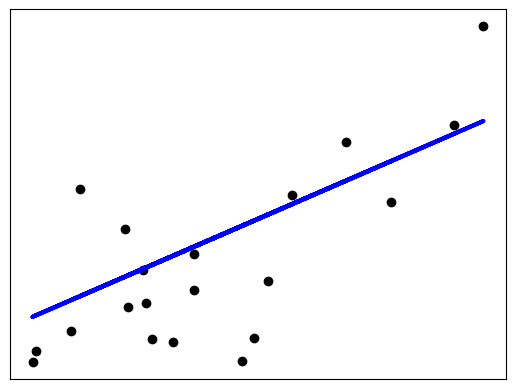

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show() 

## Tests couche linéaire

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

dim_input = diabetes_X_train.shape[1]
dim_output = 1 #diabetes_y_train.shape[]


### Passe forward

In [ ]:
diabetes_y_train = diabetes_y_train.reshape(-1,1)
couche_lineaire = Linear(diabetes_X_train.shape[1], diabetes_y_train.shape[1])
output = couche_lineaire.forward(diabetes_X_train)


plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

### Calculer le cout

In [ ]:
mseloss = MSELoss()

cout = mseloss.forward(diabetes_y_train, output)
gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
#print(gradient_loss)
print(f"{cout=}")


### Mise à jour des parametres

In [ ]:
couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
print(couche_lineaire._gradient)

In [ ]:
couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)

In [ ]:
couche_lineaire.update_parameters(gradient_step=1e-3)

In [ ]:
couche_lineaire._parameters

In [ ]:
output2 = couche_lineaire.forward(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Nouveau cout

In [ ]:
cout = mseloss.forward(diabetes_y_train, output2)
print(f'{cout=}')

In [ ]:
# Création d'un tableau de données exemple
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Division en groupes de tailles égales
groupes = np.array_split(data, 3)  # Divise en 3 groupes de tailles égales

# Affichage des groupes
for groupe in groupes:
    print(groupe)


In [ ]:
# Création d'un tableau de données exemple
data = np.array(range(23))

# Taille de chaque groupe
taille_groupe = 4

# Nombre total de groupes
nombre_groupes = len(data) // taille_groupe + (1 if len(data) % taille_groupe != 0 else 0)

# Division en groupes selon la division euclidienne
groupes = np.array_split(data, nombre_groupes)

# Affichage des groupes
for groupe in groupes:
    print(groupe)


## Tests Non-linéaire

### Chargement et normalisation des données

In [ ]:
# Load the cancer dataset
cancer_X, cancer_y = datasets.load_breast_cancer(return_X_y=True)

# Données de forme (569 exemples, 30 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
cancer_X = cancer_X[:, :2]

# Split the data into training/testing sets
cancer_X_train = cancer_X[:-20]
cancer_X_test = cancer_X[-20:]

# Split the targets into training/testing sets
cancer_y_train = cancer_y[:-20]
cancer_y_test = cancer_y[-20:]

dim_input = cancer_X_train.shape[1]
dim_output = 1 # le score de chaque exemple, qui va passer par la sigmoide finale
dim_output1 = dim_input #==2


In [ ]:
scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train)

### Réseau à 2 couches linéaires avec une activation tangente entre les deux couches et une activation sigmoïde à la sortie.

In [ ]:
couche_lineaire_1 = Linear(dim_input, dim_output1)
act_tanh = Tanh()
couche_lineaire_2 = Linear(dim_output1, dim_output)
act_sig = Sigmoide()
mse_loss = MSELoss()

### Passe forward

In [ ]:
output_1 = couche_lineaire_1.forward(cancer_X_train)
act_1 = act_tanh.forward(output_1)
output_2 = couche_lineaire_2.forward(act_1)
act_2 = act_sig.forward(output_2)

In [ ]:
cout = mse_loss.forward(cancer_y_train, act_2)
cout

### Pass backward

In [ ]:
delta_mse = mse_loss.backward(cancer_y_train, act_2)

delta_act_2 = act_sig.backward_delta(output_2, delta_mse)
delta_lin_2 = couche_lineaire_2.backward_delta(act_1, delta_act_2)
delta_act_1 = act_tanh.backward_delta(output_1, delta_lin_2)
delta_lin_1 = couche_lineaire_1.backward_delta(cancer_X_train, delta_act_1)

couche_lineaire_2.backward_update_gradient(act_1, delta_act_2)
couche_lineaire_1.backward_update_gradient(cancer_X_train, delta_act_1)


In [ ]:
couche_lineaire_1.update_parameters(gradient_step=10)
couche_lineaire_2.update_parameters(gradient_step=10)

In [ ]:
output_1 = couche_lineaire_1.forward(cancer_X_train)
act_1 = act_tanh.forward(output_1)
output_2 = couche_lineaire_2.forward(act_1)
act_2 = act_sig.forward(output_2)

In [ ]:
cout = mse_loss.forward(cancer_y_train, act_2)
cout

### Boucle d'apprentissage

In [ ]:
i = list(range(101))
plt.plot(i, couts)

In [ ]:
predict = np.round(act_2)
predict

In [ ]:
print(accuracy_score(cancer_y_train, predict))

### Tests avec eps=20

In [ ]:
## Création du réseau
couche_lineaire_1 = Linear(dim_input, dim_output1)
act_tanh = Tanh()
couche_lineaire_2 = Linear(dim_input, dim_output)
act_sig = Sigmoide()
mse_loss = MSELoss()

# Passe forward initiale
output_1 = couche_lineaire_1.forward(cancer_X_train)
act_1 = act_tanh.forward(output_1)
output_2 = couche_lineaire_2.forward(act_1)
act_2 = act_sig.forward(output_2)

couts = []
couts.append(mse_loss.forward(cancer_y_train, act_2))
nb_iter = 100

for i in range(nb_iter):
    # passe backward
    ## Calcul des deltas
    delta_1 = mse_loss.backward(cancer_y_train, act_2)
    delta_2 = act_sig.backward_delta(output_2, delta_1)
    delta_3 = couche_lineaire_2.backward_delta(act_1, delta_2)
    delta_4 = act_tanh.backward_delta(output_1, delta_3)
    delta_5 = couche_lineaire_1.backward_delta(cancer_X_train, delta_4)
    
    ## MàJ des gradients
    couche_lineaire_2.backward_update_gradient(act_1, delta_2)
    couche_lineaire_1.backward_update_gradient(cancer_X_train, delta_4)

    ## MàJ des paramètres
    couche_lineaire_1.update_parameters(gradient_step=20)
    couche_lineaire_2.update_parameters(gradient_step=20)
    
    #Passe forward
    output_1 = couche_lineaire_1.forward(cancer_X_train)
    act_1 = act_tanh.forward(output_1)
    output_2 = couche_lineaire_2.forward(act_1)
    act_2 = act_sig.forward(output_2)

    couts.append(mse_loss.forward(cancer_y_train, act_2))
    
    
    


In [ ]:
i = list(range(101))
plt.plot(i, couts)

In [ ]:
predict = np.round(act_2)

In [ ]:
print(accuracy_score(cancer_y_train, predict))

### tests dataset test

In [ ]:
from NonLineaire.Reseau2Couches import Reseau2Couches

In [ ]:
np.random.seed(0)

In [ ]:
nn = Reseau2Couches(dim_input=2, dim_hidden=2)
nn.fit(cancer_X_train, cancer_y_train, nb_iter=10, learning_rate=20)
print(nn.accuracy_train)

y_hat = nn.predict(cancer_X_test)
nn.accuracy(cancer_y_test, y_hat)


In [ ]:
nn.plot_couts()

In [ ]:
nn2 = Reseau2Couches(dim_input=2, dim_hidden=2)
nn2.fit(cancer_X_train, cancer_y_train, nb_iter=20, learning_rate=30)
print(nn2.accuracy_train)

y_hat = nn2.predict(cancer_X_test)
nn2.accuracy(cancer_y_test, y_hat)


# Sequentiel

In [4]:
mse_loss = MSELoss()
net = Sequentiel(Linear(dim_input, dim_output1), Tanh(), Linear(dim_output1, dim_output), Sigmoide())

NameError: name 'dim_output1' is not defined

In [ ]:
nb_elements_reduit = 100
cancer_X_train_reduit = cancer_X_train[:nb_elements_reduit]
cancer_y_train_reduit = cancer_y_train[:nb_elements_reduit]

In [ ]:
import numpy as np
from Encapsulation.Optim import Optim

def SGD(net, X, Y, taille_batch, loss, nb_iter=100, eps=1e-3, shuffle=False):
    """_summary_

    Args:
        net (_type_): _description_
        X (np.ndarray): L'ensemble des exemples de train
        Y (np.ndarray): L'ensemble des labels de train
        taille_batch (int): La taille de chaque batch
        loss (Function): La fonction de cout
        nb_iter (int, optional): Nombre d'itérations. Defaults to 100.
        eps (float, optional): Pas de gradient. Defaults to 1e-3.
        shuffle (bool, optional): Si permuter les exemples ou non. Defaults to False.

    Returns:
        optim._couts : La liste des couts calculés par l'optimiseur
        net : Le réseau de neurones entraîné
    """
    ## Decouper X et Y en batchs
    
    if shuffle:
        X_Y = np.random.shuffle(X_Y)
    
    #X_Y = list(zip(X,Y))
    Y = np.reshape(Y, (-1, 1))
    X_Y = np.hstack((X, Y))
    batches = np.array_split(np.array(X_Y), taille_batch)
    # Ajouter les epochs
    for batch in batches:
        optim = Optim(net, loss, eps)
        batch_x = [b[:-1] for b in batch]
        batch_y = [b[-1] for b in batch]
        
        optim.step(batch_x, batch_y)
        
    return net, optim._couts
    

In [5]:
SGD(net, cancer_X_train_reduit, cancer_y_train_reduit, taille_batch=20, loss=mse_loss)

NameError: name 'net' is not defined

# Tests sequentiel

In [ ]:
import mltools as tl

In [ ]:
size = 1500

datax, datay = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)
testx, testy = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)


datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))



nh = 80
nh2 = 60

def pred(x):
    return np.where(x >= 0.5,1, 0)


loss_mse = MSELoss()
couche_lin = Linear( datax.shape[1], nh)
couche_lin2 = Linear(nh, nh2)
couche_lin3 = Linear(nh2, 1,)

sig = Sigmoide()
tan = Tanh()

net = Sequentiel(*[couche_lin,tan,couche_lin2,tan,couche_lin3,sig])

opt = Optim(net,loss_mse,eps=1e-4)
sizeba = 100
mean, std = SGD(net, datax, datay, sizeba, loss_mse, 100)

print("accuracy : ",opt.score(testx,testy))

tl.plot_frontiere(testx, opt._net.predict, step=100)
tl.plot_data(testx, testy.reshape(-1))
plt.figure()
plt.plot(mean,'black')
plt.plot(std,'blue')
plt.legend(('Moyenne', 'Variance'))
plt.show()